<a href="https://colab.research.google.com/github/apoorvkh/notebooks/blob/main/Face%20Alignment%20(5pt%20similarity).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installation

In [ ]:
%%bash
pip install numpy opencv-python scikit-image

# Transform

In [2]:
from skimage.transform import SimilarityTransform
import numpy as np
import cv2

In [3]:
CROP_SIZE = (112, 112)

reference_pts = np.float32(np.array([
    [0.341916, 0.4615741],  # left eye
    [0.656533, 0.4598339],  # right eye
    [0.500225, 0.6405054],  # nose
    [0.370975, 0.8246919],  # left mouth
    [0.631516, 0.8232509]   # right mouth
]) * CROP_SIZE)

def warp_face(img, face_pts):
    tform = SimilarityTransform()
    tform.estimate(face_pts, reference_pts)
    T = tform.params[:2]
    return cv2.warpAffine(img, T, CROP_SIZE)

# Visualization

In [4]:
from google.colab.patches import cv2_imshow

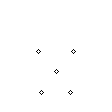

In [5]:
template = np.ones(CROP_SIZE, dtype=np.uint8) * 255
for p in reference_pts:
    cv2.circle(template, (int(p[0]), int(p[1])), 2, (0, 0, 255))
cv2_imshow(template)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   99k  100   99k    0     0   283k      0 --:--:-- --:--:-- --:--:--  283k


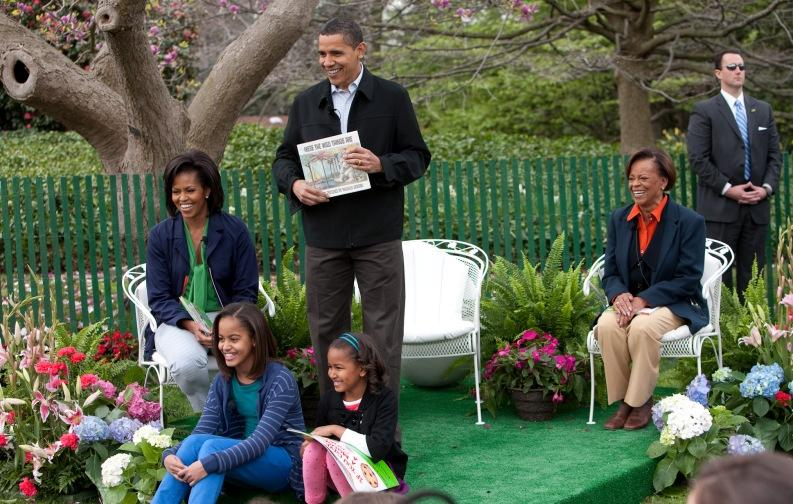

In [6]:
!curl -o image.jpg https://upload.wikimedia.org/wikipedia/commons/5/56/Obamas_at_White_House_Easter_Egg_Roll_4-13-09_1.JPG

img = cv2.imread('image.jpg')
h, w = img.shape[:2]
cv2_imshow(img)

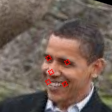

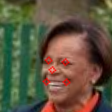

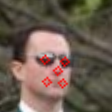

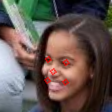

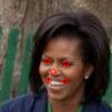

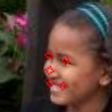

In [7]:
detected_keypoints = [
    np.array([[337.0250, 52.92], [322.75, 53.424], [327.50, 63.], [327.50, 71.064], [340.9900, 69.552]], dtype=np.float32),
    np.array([[643.9159, 177.408], [632.02, 177.91199], [635.19, 183.96], [632.8139, 191.52], [645.50, 190.512]], dtype=np.float32),
    np.array([[741.45, 67.536], [731.9389, 67.536], [738.28, 72.07201], [733.52, 78.624], [741.45, 78.12]], dtype=np.float32),
    np.array([[234.72, 338.688], [221.2470, 338.688], [226.0049, 346.752], [223.62, 353.808], [236.3140, 352.8]], dtype=np.float32),
    np.array([[190.3199, 190.008], [176.83, 191.52], [182.3, 198.576], [180.01, 205.63199], [192.69, 203.61601]], dtype=np.float32),
    np.array([[339.40, 367.416], [329.88, 366.912], [331.47, 374.472], [333.0, 381.528], [340.9900, 381.024]], dtype=np.float32)
]

for face_points in detected_keypoints:
    for p in face_points:
        cv2.circle(img, (int(p[0]), int(p[1])), 2, (0, 0, 255))
    warped_face = warp_face(img, face_points)
    cv2_imshow(warped_face)